In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

import pandas as pd
import IPython.display as display
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import os,random
import matplotlib.pyplot as plt
print(tf.__version__)

2.3.0


In [2]:
img_width = 32
img_height = 32

train_data_dir = 'facemask801010/train'
validation_data_dir = 'facemask801010/validation'
test_data_dir = 'facemask801010/test'
train_samples = 800
validation_samples = 100
epochs=10
batch_size = 8
# Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,shuffle=False,
    class_mode='binary')

Found 800 images belonging to 2 classes.


In [5]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [6]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),shuffle=False,
    class_mode='binary')

Found 100 images belonging to 2 classes.


In [7]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size, shuffle=False,
    class_mode='binary')

Found 100 images belonging to 2 classes.


In [8]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

ModuleNotFoundError: No module named 'skimage'

In [9]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape=(img_width,img_height,3), include_top=False)#, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = layers.Flatten()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

vggmodel = tf.keras.models.Model(pre_trained_model.input, x)

vggmodel.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(lr=.0001),
              metrics=['accuracy'])

vggmodel.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)        

In [10]:
vgghist=vggmodel.fit_generator(train_generator,epochs=10,
                               validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
100/100 [==============================] - 40s 397ms/step - loss: 0.1438 - accuracy: 0.9337 - val_loss: 0.0143 - val_accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 37s 365ms/step - loss: 0.0143 - accuracy: 0.9975 - val_loss: 0.0074 - val_accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 39s 388ms/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 38s 376ms/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 0.0721 - val_accuracy: 0.9800
Epoch 5/10
100/100 [==============================] - 36s 360ms/step - loss: 0.0055 - accuracy: 0.9975 - val_loss: 4.1189e-04 - val_accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 34s 345ms/step - loss: 0.0646 - accuracy: 0.9825 - val_loss: 0.0755 - val_accuracy: 0.9800
Epoch 7/10
100/100 [==============================

In [11]:
vggmodel.save("vggmodel.h5")

In [16]:
test_loss, test_acc = vggmodel.evaluate(validation_generator, verbose = 2)
print('\nTest Accuracy :', test_acc)

13/13 - 1s - loss: 0.0261 - accuracy: 0.9900

Test Accuracy : 0.9900000095367432


In [33]:
import tensorflow as tf
load_model = tf.keras.models.load_model('vggmodel.h5')
load_model.layers[0].input_shape

[(None, 32, 32, 3)]

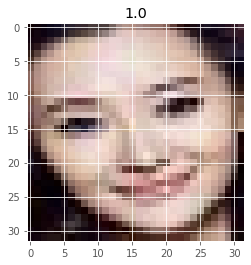

In [34]:
from keras.preprocessing import image
image_path="4.jpg"
img = image.load_img(image_path, target_size=(32,32))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=load_model.predict(img)
plt.title((result[0][0]))
plt.show()

In [35]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [36]:
#get list of layer from model
layer_outputs = [layer.output for layer in vggmodel.layers[1:]]

In [37]:
import tensorflow
#create visualization model
visualize_model = tensorflow.keras.models.Model(inputs=vggmodel.input , outputs = layer_outputs)


block1_conv1
64


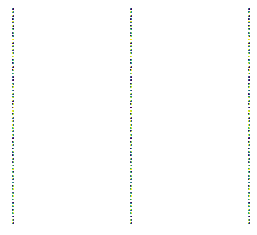

block1_conv2
64


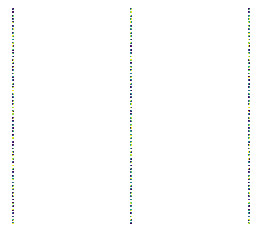

block2_conv1
128


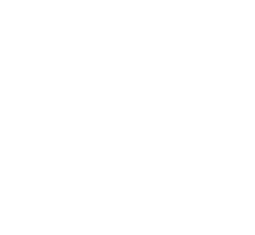

block2_conv2
128


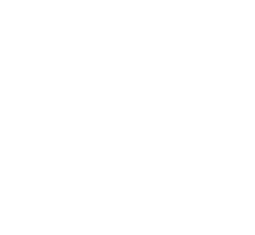

block3_conv1
256


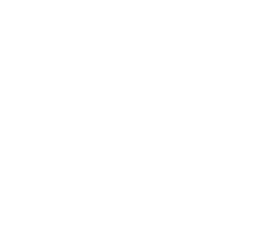

block3_conv2
256


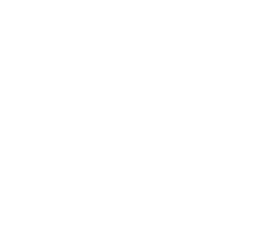

block3_conv3
256


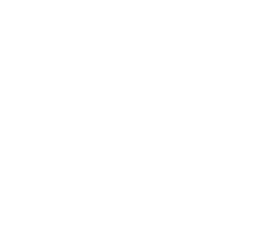

block4_conv1
512


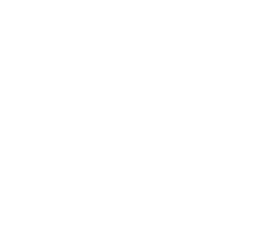

block4_conv2
512


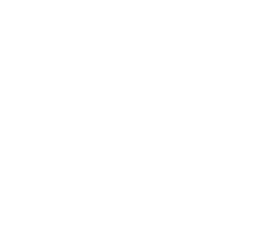

block4_conv3
512


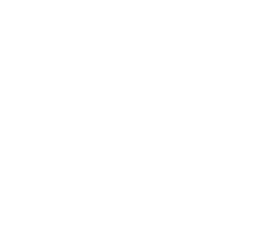

block5_conv1
512


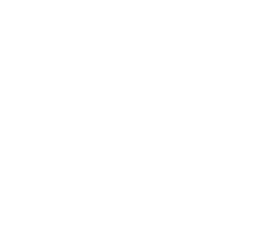

block5_conv2
512


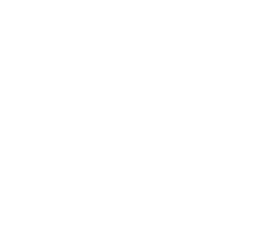

block5_conv3
512


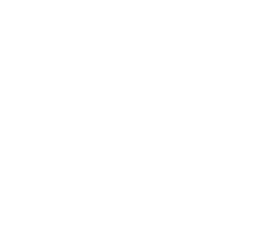

In [38]:
for layer in vggmodel.layers:
    if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        print(layer.name)
        
        #normalize filter values between  0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        filter_cnt=1
        
        #plotting all the filters
        for i in range(filters.shape[3]):
            #get the filters
            filt=filters[:,:,:, i]
            #plotting each of the channel, color image RGB channels
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:,:, j])
                filter_cnt+=1
        plt.show()

(1, 32, 32, 64)
(1, 32, 32, 64)
(1, 16, 16, 64)
(1, 16, 16, 128)
(1, 16, 16, 128)
(1, 8, 8, 128)
(1, 8, 8, 256)


<ipython-input-39-cb084bfcc2a8>:39: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


(1, 8, 8, 256)
(1, 8, 8, 256)
(1, 4, 4, 256)
(1, 4, 4, 512)
(1, 4, 4, 512)
(1, 4, 4, 512)
(1, 2, 2, 512)
(1, 2, 2, 512)
(1, 2, 2, 512)
(1, 2, 2, 512)
(1, 1, 1, 512)
(1, 512)
(1, 512)
(1, 512)
(1, 1)


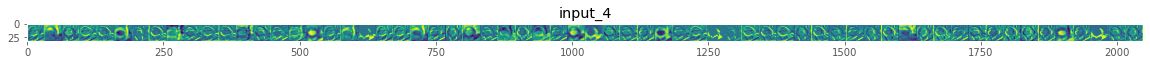

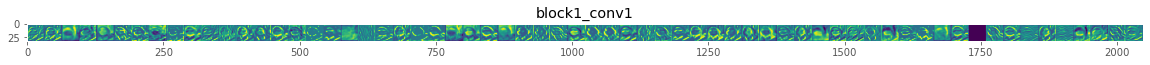

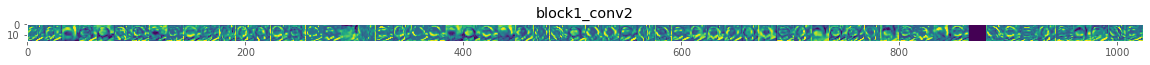

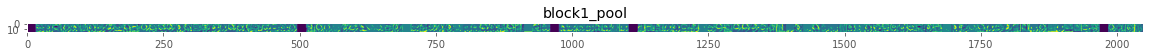

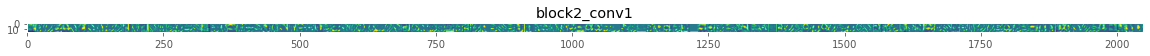

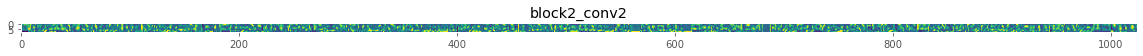

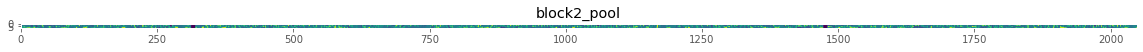

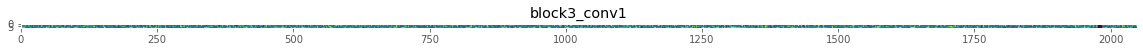

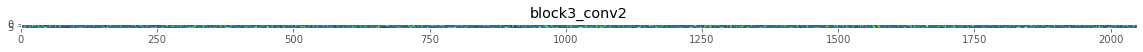

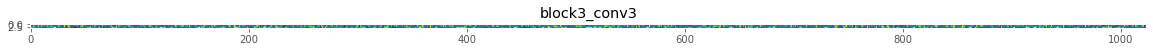

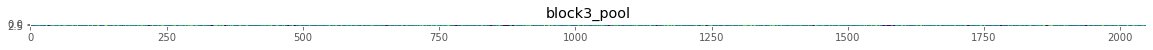

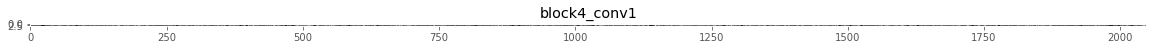

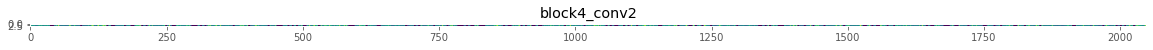

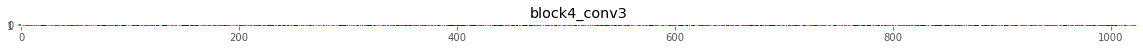

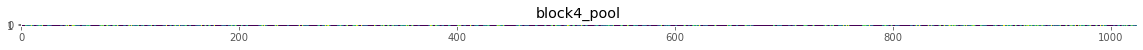

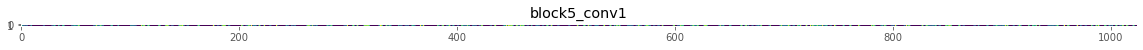

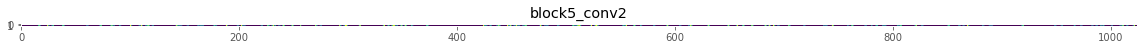

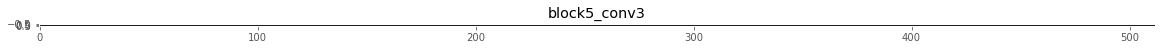

In [39]:
img_path='mask.3.jpg' #mask
# Define a new Model, Input= image 
# Output= intermediate representations for all layers in the  
# previous model after the first.
successive_outputs = [layer.output for layer in vggmodel.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
#visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
import tensorflow
#create visualization model
visualization_model = tensorflow.keras.models.Model(inputs=vggmodel.input , outputs = layer_outputs)
#Load the input image
img = load_img(img_path, target_size=(32, 32))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = x.reshape((1,) + x.shape)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in vggmodel.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

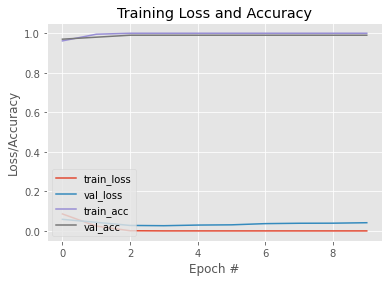

In [40]:
# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), vgghist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), vgghist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), vgghist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), vgghist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


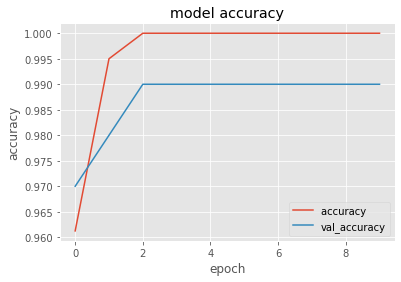

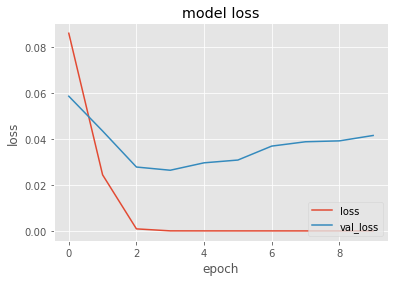

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

# list all data in history
print(vgghist.history.keys())
# summarize history for accuracy
plt.plot(vgghist.history['accuracy'],label='accuracy ')
plt.plot(vgghist.history['val_accuracy'],label = 'val_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

# summarize history for loss
plt.plot(vgghist.history['loss'], label = 'loss')
plt.plot(vgghist.history['val_loss'], label = 'val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='lower right')
plt.show()

In [17]:
#Print the Target names

target_names = []
for key in test_generator.class_indices:
    target_names.append(key)

print(target_names)

['mask', 'nomask']


In [18]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(5,5))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    #if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #cm = np.around(cm, decimals=2)
        #cm[np.isnan(cm)] = 0.0
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="cyan" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [75]:
import sklearn
sklearn.metrics.classification_report(test_generator.classes, y_pred, labels=None, target_names=target_names)

'              precision    recall  f1-score   support\n\n        mask       1.00      0.96      0.98        50\n      nomask       0.96      1.00      0.98        50\n\n    accuracy                           0.98       100\n   macro avg       0.98      0.98      0.98       100\nweighted avg       0.98      0.98      0.98       100\n'

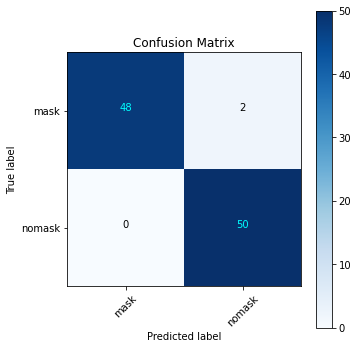

In [66]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools 
Y_pred = vggmodel.predict_generator(test_generator)
y_pred = np.where(Y_pred>0.5,1,0)
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [46]:
## Now Predict
from os import listdir
from os.path import isfile, join
predict_dir_path='facemask801010/test/mask/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['mask.449.jpg', 'mask.450.jpg', 'mask.451.jpg', 'mask.452.jpg', 'mask.453.jpg', 'mask.454.jpg', 'mask.455.jpg', 'mask.456.jpg', 'mask.457.jpg', 'mask.458.jpg', 'mask.459.jpg', 'mask.460.jpg', 'mask.461.jpg', 'mask.462.jpg', 'mask.463.jpg', 'mask.464.jpg', 'mask.465.jpg', 'mask.466.jpg', 'mask.467.jpg', 'mask.468.jpg', 'mask.469.jpg', 'mask.470.jpg', 'mask.471.jpg', 'mask.472.jpg', 'mask.473.jpg', 'mask.474.jpg', 'mask.475.jpg', 'mask.476.jpg', 'mask.477.jpg', 'mask.478.jpg', 'mask.479.jpg', 'mask.480.jpg', 'mask.481.jpg', 'mask.482.jpg', 'mask.483.jpg', 'mask.484.jpg', 'mask.485.jpg', 'mask.486.jpg', 'mask.487.jpg', 'mask.488.jpg', 'mask.489.jpg', 'mask.490.jpg', 'mask.491.jpg', 'mask.492.jpg', 'mask.493.jpg', 'mask.494.jpg', 'mask.495.jpg', 'mask.496.jpg', 'mask.497.jpg', 'mask.498.jpg']


In [47]:
from keras.preprocessing import image
mask_counter = 0 
nomask_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = vggmodel.predict(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'mask')
        mask_counter += 1
    else:
        print(file + ": " + 'nomask')
        nomask_counter += 1
print("Total Mask :",mask_counter)
print("Total Nomask :",nomask_counter)

mask.449.jpg: mask
mask.450.jpg: mask
mask.451.jpg: mask
mask.452.jpg: mask
mask.453.jpg: mask
mask.454.jpg: mask
mask.455.jpg: mask
mask.456.jpg: mask
mask.457.jpg: mask
mask.458.jpg: mask
mask.459.jpg: mask
mask.460.jpg: mask
mask.461.jpg: mask
mask.462.jpg: mask
mask.463.jpg: mask
mask.464.jpg: mask
mask.465.jpg: mask
mask.466.jpg: mask
mask.467.jpg: mask
mask.468.jpg: mask
mask.469.jpg: mask
mask.470.jpg: mask
mask.471.jpg: mask
mask.472.jpg: mask
mask.473.jpg: mask
mask.474.jpg: mask
mask.475.jpg: mask
mask.476.jpg: mask
mask.477.jpg: mask
mask.478.jpg: mask
mask.479.jpg: mask
mask.480.jpg: mask
mask.481.jpg: mask
mask.482.jpg: mask
mask.483.jpg: mask
mask.484.jpg: mask
mask.485.jpg: mask
mask.486.jpg: mask
mask.487.jpg: mask
mask.488.jpg: mask
mask.489.jpg: mask
mask.490.jpg: mask
mask.491.jpg: mask
mask.492.jpg: mask
mask.493.jpg: mask
mask.494.jpg: mask
mask.495.jpg: mask
mask.496.jpg: mask
mask.497.jpg: mask
mask.498.jpg: mask
Total Mask : 50
Total Nomask : 0


In [48]:
## Now Predict
from os import listdir
from os.path import isfile, join
predict_dir_path='facemask801010/test/nomask/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['nomask.0.jpg', 'nomask.1.jpg', 'nomask.10.jpg', 'nomask.11.jpg', 'nomask.12.jpg', 'nomask.13.jpg', 'nomask.14.jpg', 'nomask.15.jpg', 'nomask.16.jpg', 'nomask.17.jpg', 'nomask.18.jpg', 'nomask.19.jpg', 'nomask.2.jpg', 'nomask.20.jpg', 'nomask.21.jpg', 'nomask.22.jpg', 'nomask.23.jpg', 'nomask.24.jpg', 'nomask.25.jpg', 'nomask.26.jpg', 'nomask.27.jpg', 'nomask.28.jpg', 'nomask.29.jpg', 'nomask.3.jpg', 'nomask.30.jpg', 'nomask.31.jpg', 'nomask.32.jpg', 'nomask.33.jpg', 'nomask.34.jpg', 'nomask.35.jpg', 'nomask.36.jpg', 'nomask.37.jpg', 'nomask.38.jpg', 'nomask.39.jpg', 'nomask.4.jpg', 'nomask.40.jpg', 'nomask.41.jpg', 'nomask.42.jpg', 'nomask.43.jpg', 'nomask.44.jpg', 'nomask.45.jpg', 'nomask.46.jpg', 'nomask.47.jpg', 'nomask.48.jpg', 'nomask.49.jpg', 'nomask.5.jpg', 'nomask.6.jpg', 'nomask.7.jpg', 'nomask.8.jpg', 'nomask.9.jpg']


In [49]:
from keras.preprocessing import image
mask_counter = 0 
nomask_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = vggmodel.predict(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'mask')
        mask_counter += 1
    else:
        print(file + ": " + 'nomask')
        nomask_counter += 1
print("Total Mask :",mask_counter)
print("Total Nomask :",nomask_counter)

nomask.0.jpg: nomask
nomask.1.jpg: nomask
nomask.10.jpg: nomask
nomask.11.jpg: nomask
nomask.12.jpg: nomask
nomask.13.jpg: nomask
nomask.14.jpg: nomask
nomask.15.jpg: nomask
nomask.16.jpg: nomask
nomask.17.jpg: nomask
nomask.18.jpg: nomask
nomask.19.jpg: nomask
nomask.2.jpg: nomask
nomask.20.jpg: nomask
nomask.21.jpg: nomask
nomask.22.jpg: nomask
nomask.23.jpg: nomask
nomask.24.jpg: nomask
nomask.25.jpg: nomask
nomask.26.jpg: nomask
nomask.27.jpg: nomask
nomask.28.jpg: nomask
nomask.29.jpg: nomask
nomask.3.jpg: nomask
nomask.30.jpg: nomask
nomask.31.jpg: nomask
nomask.32.jpg: nomask
nomask.33.jpg: nomask
nomask.34.jpg: nomask
nomask.35.jpg: nomask
nomask.36.jpg: nomask
nomask.37.jpg: nomask
nomask.38.jpg: nomask
nomask.39.jpg: nomask
nomask.4.jpg: nomask
nomask.40.jpg: nomask
nomask.41.jpg: nomask
nomask.42.jpg: nomask
nomask.43.jpg: nomask
nomask.44.jpg: nomask
nomask.45.jpg: nomask
nomask.46.jpg: nomask
nomask.47.jpg: nomask
nomask.48.jpg: nomask
nomask.49.jpg: nomask
nomask.5.jpg: n

In [50]:
## Now Predict
predict_dir_path='facemask801010/coba/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['1(maskerdidagu).jpg', '7384aef5-e918-48f0-a8da-36b99c78116d.jpeg', 'coba2.png', 'download (1).jpg', 'download.jpg']


In [51]:
from keras.preprocessing import image
mask_counter = 0 
nomask_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = vggmodel.predict(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'mask')
        mask_counter += 1
    else:
        print(file + ": " + 'nomask')
        nomask_counter += 1
print("Total Mask :",mask_counter)
print("Total Nomask :",nomask_counter)

1(maskerdidagu).jpg: mask
7384aef5-e918-48f0-a8da-36b99c78116d.jpeg: mask
coba2.png: mask
download (1).jpg: mask
download.jpg: mask
Total Mask : 5
Total Nomask : 0


In [52]:
## Now Predict
from os import listdir
from os.path import isfile, join
predict_dir_path='facemask801010/test2/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['1.jpg', '10.jpg', '100.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '17.jpg', '18.jpg', '19.jpg', '2.jpg', '20.jpg', '21.jpg', '22.jpg', '23.jpg', '24.jpg', '25.jpg', '26.jpg', '27.jpg', '28.jpg', '29.jpg', '3.jpg', '30.jpg', '31.jpg', '32.jpg', '33.jpg', '34.jpg', '35.jpg', '36.jpg', '37.jpg', '38.jpg', '39.jpg', '4.jpg', '40.jpg', '41.jpg', '42.jpg', '43.jpg', '44.jpg', '45.jpg', '46.jpg', '47.jpg', '48.jpg', '49.jpg', '5.jpg', '50.jpg', '51.jpg', '52.jpg', '53.jpg', '54.jpg', '55.jpg', '56.jpg', '57.jpg', '58.jpg', '59.jpg', '6.jpg', '60.jpg', '61.jpg', '62.jpg', '63.jpg', '64.jpg', '65.jpg', '66.jpg', '67.jpg', '68.jpg', '69.jpg', '7.jpg', '70.jpg', '71.jpg', '72.jpg', '73.jpg', '74.jpg', '75.jpg', '76.jpg', '77.jpg', '78.jpg', '79.jpg', '8.jpg', '80.jpg', '81.jpg', '82.jpg', '83.jpg', '84.jpg', '85.jpg', '86.jpg', '87.jpg', '88.jpg', '89.jpg', '9.jpg', '90.jpg', '91.jpg', '92.jpg', '93.jpg', '94.jpg', '95.jpg', '96.jpg', '97.jpg', '98.jpg', '99.jpg']


In [53]:
from keras.preprocessing import image
mask_counter = 0 
nomask_counter  = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = vggmodel.predict(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 0:
        print(file + ": " + 'mask')
        mask_counter += 1
    else:
        print(file + ": " + 'nomask')
        nomask_counter += 1
print("Total Mask :",mask_counter)
print("Total Nomask :",nomask_counter)

1.jpg: mask
10.jpg: nomask
100.jpg: nomask
11.jpg: mask
12.jpg: nomask
13.jpg: mask
14.jpg: nomask
15.jpg: mask
16.jpg: nomask
17.jpg: mask
18.jpg: nomask
19.jpg: mask
2.jpg: nomask
20.jpg: nomask
21.jpg: mask
22.jpg: nomask
23.jpg: mask
24.jpg: nomask
25.jpg: mask
26.jpg: nomask
27.jpg: mask
28.jpg: nomask
29.jpg: mask
3.jpg: mask
30.jpg: nomask
31.jpg: mask
32.jpg: nomask
33.jpg: mask
34.jpg: nomask
35.jpg: mask
36.jpg: nomask
37.jpg: mask
38.jpg: nomask
39.jpg: mask
4.jpg: nomask
40.jpg: nomask
41.jpg: mask
42.jpg: nomask
43.jpg: mask
44.jpg: nomask
45.jpg: mask
46.jpg: nomask
47.jpg: mask
48.jpg: nomask
49.jpg: mask
5.jpg: mask
50.jpg: nomask
51.jpg: mask
52.jpg: nomask
53.jpg: mask
54.jpg: nomask
55.jpg: mask
56.jpg: nomask
57.jpg: mask
58.jpg: nomask
59.jpg: mask
6.jpg: nomask
60.jpg: nomask
61.jpg: mask
62.jpg: nomask
63.jpg: mask
64.jpg: nomask
65.jpg: mask
66.jpg: nomask
67.jpg: mask
68.jpg: nomask
69.jpg: mask
7.jpg: mask
70.jpg: nomask
71.jpg: mask
72.jpg: nomask
73.jpg: mas